In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

C:\Users\TushaCr7\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df = df.drop("Id", axis=1)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.columns = ["sepalLength","sepalWidth","petalLength","petalWidth","species"]

In [86]:
df["Species"]=df["species"].astype("category")

In [87]:
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [88]:
df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [89]:
df.isnull().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
species        0
Species        0
dtype: int64

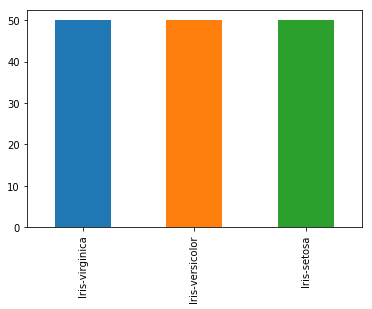

In [90]:
df["Species"].value_counts().plot(kind="bar")

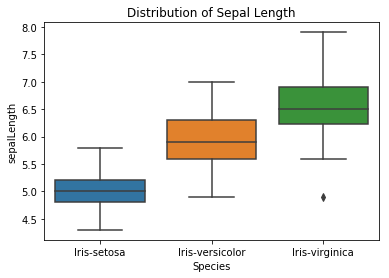

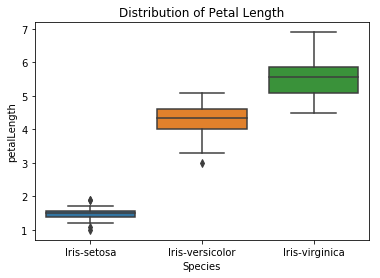

In [91]:
sns.boxplot(x="Species",y="sepalLength",data=df)
plt.title("Distribution of Sepal Length")
plt.show()
sns.boxplot(x="Species",y="petalLength",data=df)
plt.title("Distribution of Petal Length")
plt.show()

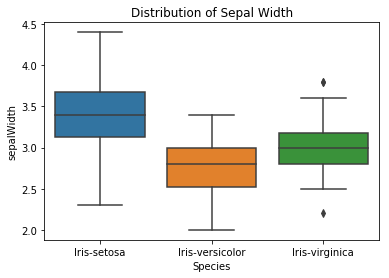

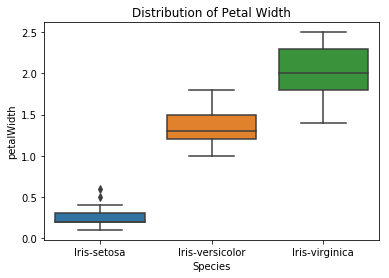

In [92]:
sns.boxplot(x="Species",y="sepalWidth",data=df)
plt.title("Distribution of Sepal Width")
plt.show()
sns.boxplot(x="Species",y="petalWidth",data=df)
plt.title("Distribution of Petal Width")
plt.show()

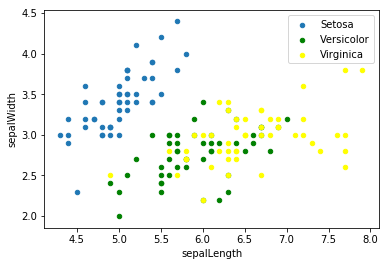

In [93]:
#Distribution of sepal length and width for the three different classes
figure = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='sepalLength',y='sepalWidth',label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='sepalLength',y='sepalWidth',label='Versicolor',color='green',ax=figure)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='sepalLength',y='sepalWidth',label='Virginica',color='yellow',ax=figure)
plt.show()

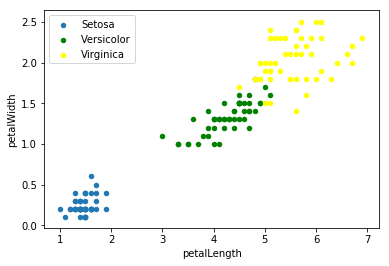

In [94]:
#Distribution of petal length and width for the three different classes
figure = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='petalLength',y='petalWidth',label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='petalLength',y='petalWidth',label='Versicolor',color='green',ax=figure)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='petalLength',y='petalWidth',label='Virginica',color='yellow',ax=figure)
plt.show()

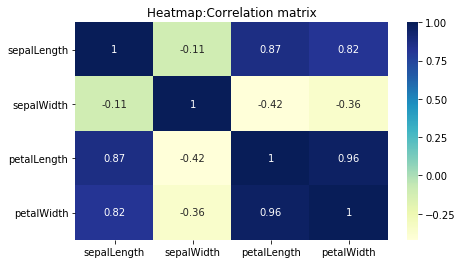

In [95]:
#plot the correlation matrix
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Heatmap:Correlation matrix")
plt.show()

We can see that petal length and width are highly correlated whereass sepal length and width are not coreelated.

In [96]:
df = df.drop(["species"],axis=1)
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [97]:
X = df.iloc[:,:-1]
y=df.iloc[:,4]

Using ML algorithms on the dataset

In [101]:
#splitting the data set
X_train ,X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [102]:
#Logistic regression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
y_pred = regressor.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100 , str('%'))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 96.66666666666667 %
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [104]:
#k-NN classifier
classifier =  KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [105]:
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100 , str('%'))

Accuracy: 96.66666666666667 %


Let's try out kNN for different values of n

In [106]:
n = [1,3,5,7,9]
accuracy_list = []
for i in n:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = metrics.accuracy_score(y_test,y_pred)*100 
    print(accuracy)
    accuracy_list.append(accuracy)

100.0
96.66666666666667
96.66666666666667
100.0
100.0


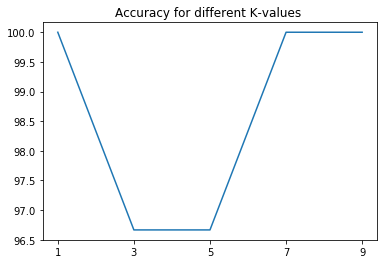

In [107]:
plt.plot(n,accuracy_list)
plt.xticks(n)
plt.title("Accuracy for different K-values ")
plt.show()

In [108]:
#SVM classifier
classifier = SVC(kernel = "linear")
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
y_pred = classifier.predict(X_test)
print("Accuracy is:",100*(metrics.accuracy_score(y_test,y_pred)), str('%'))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy is: 100.0 %
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
